# Escalator Binary Classification Project

In this project, we intend to build a model that can recognize whether there may be any dangerous objects in close proximity to the escalator.

## Importing Libraries

In [207]:
import cv2
from IPython.display import Image
from IPython.core.display import HTML 
import keras
from keras.preprocessing import image
import numpy as np
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

## Data Sample

Before preprocessing the images and converting them into an array of numbers that can be trained, the dataset needs some slight adjustments. In order to resolve the issue of asymmetric data and incorporate balance into the sample, random images from the larger ‘Safe’ class were selected using a random number generator to match the size of the smaller ‘Unsafe’ class. Although this significantly reduced the size of the overall dataset, it is critical that both classes are fairly represented to prevent the possibility of yielding a misleading accuracy rate.

656 'Safe' Images + 656 'Unsafe' Images = 1312 Total Images

In [2]:
train = pd.read_csv('Downloads/Escalator Final Labels.csv')
train.head()

Image Name Label  Safe  Unsafe
0   escalator_720.jpg  Safe     1       0
1  escalator_2413.jpg  Safe     1       0
2  escalator_2373.jpg  Safe     1       0
3  escalator_2253.jpg  Safe     1       0
4   escalator_203.jpg  Safe     1       0

## ResNet Model

We will be retraining the entire ResNet-50 Model.

In [3]:
from keras.applications import resnet50
resnet_model = resnet50.ResNet50(classes = 2, weights = None)

Instructions for updating:
Colocations handled automatically by placer.


### Model Summary

In [4]:
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Loading and Converting the Dataset
1. Reading the image
2. Removing noise from the image
3. Resizing the image
4. Converting the image into an array
5. Slicing the array to crop the image
6. Appending the image to the set of training images

In [5]:
train_image = []

for i in tqdm(range(train.shape[0])):
    img = cv2.imread('Downloads/Sorted Escalators/'+train['Label'][i]+'//'+train['Image Name'][i])
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    resized = cv2.resize(dst, (500,250))
    img = image.img_to_array(resized)
    cropped_img = img[12:236, 134:358]
    cropped_img = cropped_img/255.0
    train_image.append(cropped_img)
    
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████| 1312/1312 [2:14:53<00:00,  6.11s/it]


### Removing Noise

In [6]:
example_img = cv2.imread('Downloads/Sorted Escalators/Unsafe/escalator_593.jpg')
after_removing_noise = cv2.fastNlMeansDenoisingColored(example_img,None,10,10,7,21)

#### Before

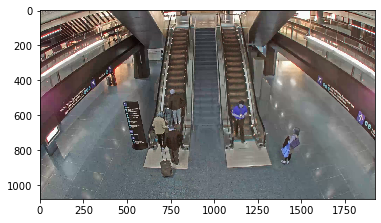

In [7]:
plt.imshow(example_img)

#### After

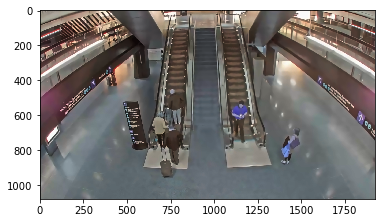

In [8]:
plt.imshow(after_removing_noise)

The image has been smoothened to reduce noise.

In [9]:
y = np.array(train.drop(['Image Name','Label'], axis=1))
y.shape

(1312, 2)

In [10]:
X.shape

(1312, 224, 224, 3)

## Sample Images
Now that we have loaded and converted our dataset, let's look at some images to see what is considered 'Safe' or 'Unsafe.'
#### Safe

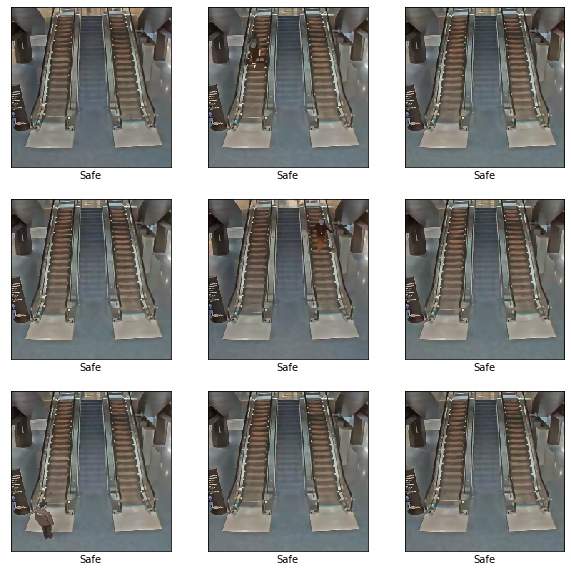

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(train['Label'][i])

Since there are no dangerous objects in close proximity to the escalator, these images are classified as 'Safe.'

#### Unsafe

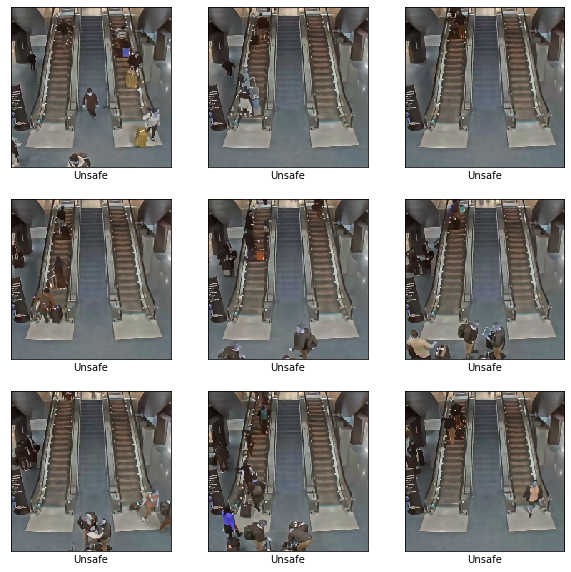

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i+657])
    plt.xlabel(train['Label'][i+657])

Since there are pieces of luggage being pulled onto the escalator, these images are classified as 'Unsafe.'

## Split Training and Validation Set

The images are split into a training and validation set at a ratio of 9:1, with 1180 training images and 132 validation images.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [16]:
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model

In [17]:
resnet_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 1180 samples, validate on 132 samples
Epoch 1/50
1180/1180 [==============================] - ETA: 29:04 - loss: 0.7146 - acc: 0.56 - ETA: 18:22 - loss: 1.1829 - acc: 0.53 - ETA: 14:37 - loss: 1.1286 - acc: 0.55 - ETA: 12:35 - loss: 1.2741 - acc: 0.52 - ETA: 11:18 - loss: 1.3420 - acc: 0.51 - ETA: 10:21 - loss: 1.2669 - acc: 0.51 - ETA: 9:40 - loss: 1.2283 - acc: 0.5179 - ETA: 9:03 - loss: 1.2396 - acc: 0.503 - ETA: 8:31 - loss: 1.1685 - acc: 0.513 - ETA: 8:03 - loss: 1.1935 - acc: 0.518 - ETA: 7:37 - loss: 1.1801 - acc: 0.517 - ETA: 7:12 - loss: 1.1329 - acc: 0.526 - ETA: 6:50 - loss: 1.0936 - acc: 0.533 - ETA: 6:29 - loss: 1.0473 - acc: 0.551 - ETA: 6:08 - loss: 0.9978 - acc: 0.572 - ETA: 5:48 - loss: 0.9588 - acc: 0.589 - ETA: 5:29 - loss: 0.9396 - acc: 0.593 - ETA: 5:11 - loss: 0.9252 - acc: 0.602 - ETA: 4:53 - loss: 0.9105 - acc: 0.610 - ETA: 4:35 - loss: 0.9032 - acc: 0.617 - ETA: 4:17 - loss: 0.8818 - acc: 0.626 - ETA: 4:0

#### Training Accuracy vs. Validation Accuracy (50 epochs)

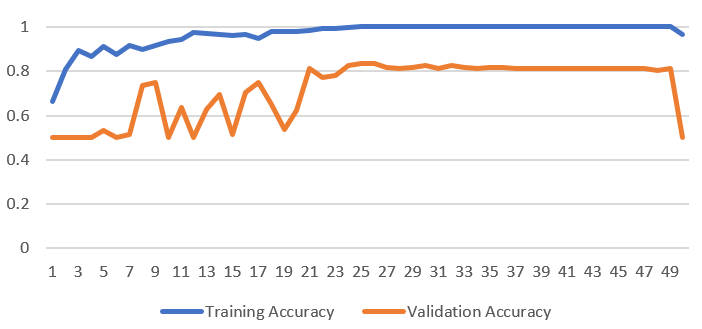

In [211]:
Image(filename = r"Pictures/graph - 50.PNG", width=600, height=600)

## Making Predictions
Using 10 random new images to test whether the model is able to correctly classify the image as safe or unsafe.

In [221]:
image_names = ['Safe/escalator_234','Safe/escalator_495','Safe/escalator_1039','Safe/escalator_548','Safe/escalator_1514',
               'Unsafe/Other/escalator_508','Unsafe/Other/escalator_093','Unsafe/Other/escalator_1345','Unsafe/escalator_1588', 
               'Unsafe/Other/escalator_098']

Creating functions to test the images and reveal probabilities.

In [201]:
def get_proba(cropped_test_img):
    classes = np.array(train.columns[2:])
    proba = resnet_model.predict(cropped_test_img.reshape(1,224,224,3))
    safe_or_unsafe = np.argsort(proba[0])[:-3:-1]
    
    text = ""
    for i in range(2):
        text += "{}".format(classes[safe_or_unsafe[i]])+" ({:.3})".format(proba[0][safe_or_unsafe[i]])+" "
    
    return text

def test_image(img):
    test_dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    test_resized = cv2.resize(test_dst, (500,250))
    img = image.img_to_array(test_resized)
    cropped_test_img = img[12:236, 134:358]
    cropped_test_img = cropped_test_img/255.0
    
    plt.imshow(cropped_test_img)
    plt.xlabel(get_proba(cropped_test_img))

#### Results

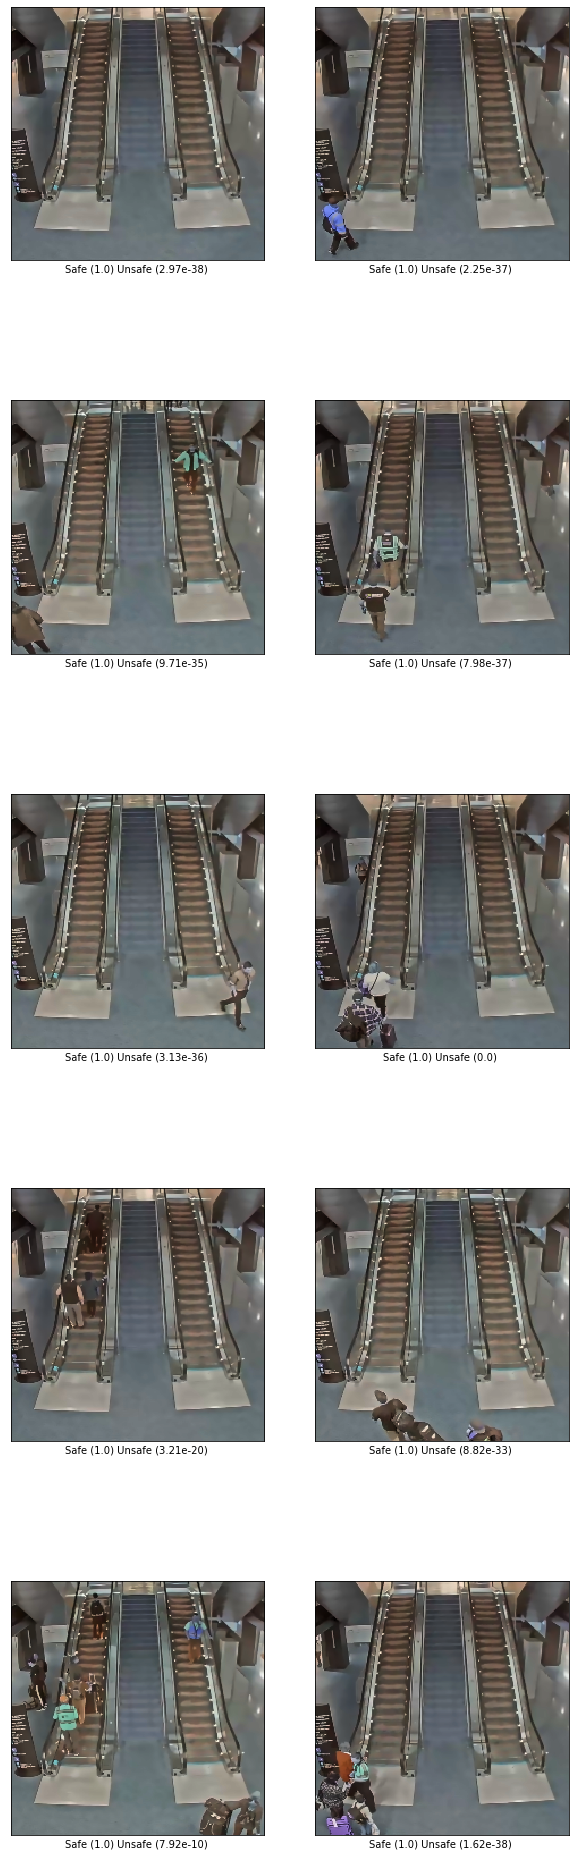

In [222]:
plt.figure(figsize=(10,35))
for i in range(len(image_names)):
    img = cv2.imread('Downloads/Sorted Escalators/'+image_names[i]+'.jpg')
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_image(img)

As we can see here, there are is an issue of overfitting. Only 5/10 images were correctly classified. The model predicts 'Safe' for all the images at a near 100% confidence, whether they are actually safe or not. We will run the model again with fewer epochs.

## Training the Model

We will run the model again with 2 epochs to see if there are better results.

In [56]:
resnet_model_2 = resnet50.ResNet50(classes = 2, weights = None)

In [57]:
resnet_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
resnet_model_2.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=32)

Train on 1180 samples, validate on 132 samples
Epoch 1/2
1180/1180 [==============================] - ETA: 53:41 - loss: 0.8029 - acc: 0.56 - ETA: 31:15 - loss: 1.3081 - acc: 0.53 - ETA: 23:23 - loss: 1.3288 - acc: 0.55 - ETA: 19:01 - loss: 1.4508 - acc: 0.53 - ETA: 16:18 - loss: 1.3514 - acc: 0.58 - ETA: 14:26 - loss: 1.2483 - acc: 0.57 - ETA: 13:07 - loss: 1.1603 - acc: 0.59 - ETA: 12:01 - loss: 1.0780 - acc: 0.61 - ETA: 11:10 - loss: 1.0309 - acc: 0.62 - ETA: 10:34 - loss: 0.9963 - acc: 0.63 - ETA: 9:53 - loss: 0.9693 - acc: 0.6420 - ETA: 9:17 - loss: 0.9839 - acc: 0.638 - ETA: 8:46 - loss: 0.9653 - acc: 0.646 - ETA: 8:17 - loss: 0.9649 - acc: 0.645 - ETA: 7:51 - loss: 0.9373 - acc: 0.650 - ETA: 7:25 - loss: 0.9285 - acc: 0.642 - ETA: 7:06 - loss: 0.9010 - acc: 0.650 - ETA: 6:43 - loss: 0.8755 - acc: 0.656 - ETA: 6:17 - loss: 0.8509 - acc: 0.664 - ETA: 5:53 - loss: 0.8375 - acc: 0.667 - ETA: 5:29 - loss: 0.8154 - acc: 0.675 - ETA: 5:06 - loss: 0.8064 - acc: 0.681 - ETA: 4:44 - loss:

#### Altering Batch Size

In [217]:
resnet_model_2_trial_2 = resnet50.ResNet50(classes = 2, weights = None)

In [218]:
resnet_model_2_trial_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [220]:
resnet_model_2_trial_2.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=64)

Train on 1180 samples, validate on 132 samples
Epoch 1/2
1180/1180 [==============================] - ETA: 30:51 - loss: 0.2699 - acc: 0.90 - ETA: 31:17 - loss: 0.2687 - acc: 0.89 - ETA: 30:31 - loss: 0.2842 - acc: 0.88 - ETA: 29:48 - loss: 0.2937 - acc: 0.87 - ETA: 28:26 - loss: 0.2566 - acc: 0.89 - ETA: 26:12 - loss: 0.2745 - acc: 0.88 - ETA: 24:03 - loss: 0.2765 - acc: 0.88 - ETA: 22:07 - loss: 0.2581 - acc: 0.89 - ETA: 20:02 - loss: 0.2479 - acc: 0.89 - ETA: 18:03 - loss: 0.2422 - acc: 0.89 - ETA: 15:55 - loss: 0.2606 - acc: 0.88 - ETA: 13:48 - loss: 0.2502 - acc: 0.89 - ETA: 11:41 - loss: 0.2535 - acc: 0.89 - ETA: 9:32 - loss: 0.2507 - acc: 0.8951 - ETA: 7:24 - loss: 0.2519 - acc: 0.894 - ETA: 5:17 - loss: 0.2484 - acc: 0.894 - ETA: 3:06 - loss: 0.2460 - acc: 0.896 - ETA: 56s - loss: 0.2401 - acc: 0.899 - 2394s 2s/step - loss: 0.2373 - acc: 0.9008 - val_loss: 3.4788 - val_acc: 0.5303
Epoch 2/2
1180/1180 [==============================] - ETA: 36:16 - loss: 0.0329 - acc: 1.00 - ETA

#### Training Accuracy vs. Validation Accuracy (2 epochs)

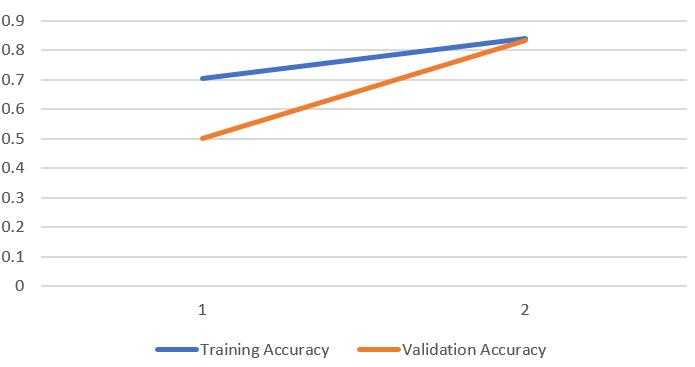

In [214]:
Image(filename = r"Pictures/graph - 2.PNG", width=600, height=600)

In [203]:
def get_proba_2(cropped_test_img):
    classes = np.array(train.columns[2:])
    proba = resnet_model_2.predict(cropped_test_img.reshape(1,224,224,3))
    safe_or_unsafe = np.argsort(proba[0])[:-3:-1]
    
    text = ""
    for i in range(2):
        text += "{}".format(classes[safe_or_unsafe[i]])+" ({:.3})".format(proba[0][safe_or_unsafe[i]])+" "
    
    return text 

def test_image_2(img):
    test_dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    test_resized = cv2.resize(test_dst, (500,250))
    img = image.img_to_array(test_resized)
    cropped_test_img = img[12:236, 134:358]
    cropped_test_img = cropped_test_img/255.0
    
    plt.imshow(cropped_test_img)
    plt.xlabel(get_proba_2(cropped_test_img))

#### Results

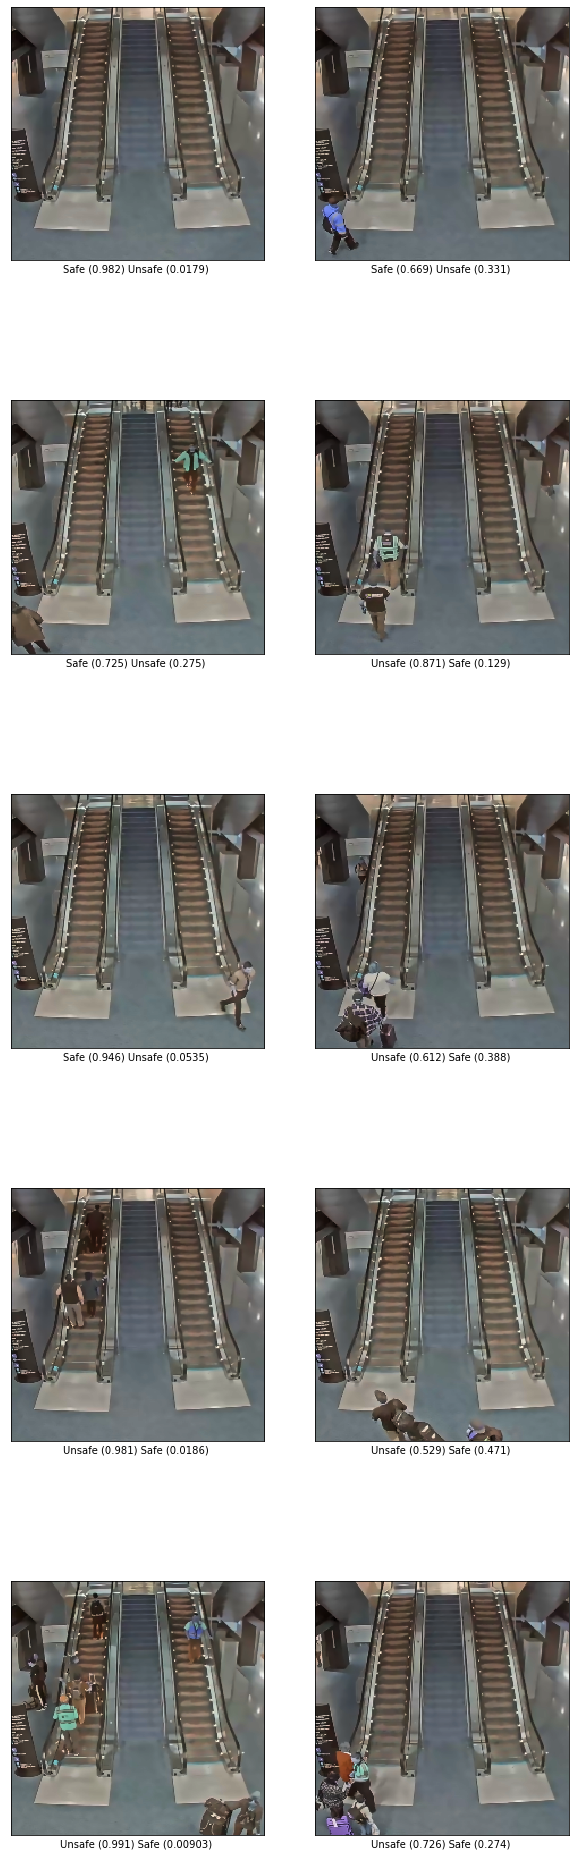

In [223]:
plt.figure(figsize=(10,35))
for i in range(len(image_names)):
    img = cv2.imread('Downloads/Sorted Escalators/'+image_names[i]+'.jpg')
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_image_2(img)

With fewer epochs, the model gives more satisfactory results, correctly classifying 9/10 new images.

## Training the Model

We will run the model again with 20 epochs to see if there are better results.

In [70]:
resnet_model_3 = resnet50.ResNet50(classes = 2, weights = None)

In [71]:
resnet_model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
resnet_model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Train on 1180 samples, validate on 132 samples
Epoch 1/20
1180/1180 [==============================] - ETA: 53:06 - loss: 0.6798 - acc: 0.50 - ETA: 33:07 - loss: 0.8636 - acc: 0.51 - ETA: 24:44 - loss: 1.1192 - acc: 0.52 - ETA: 20:16 - loss: 1.0638 - acc: 0.54 - ETA: 17:23 - loss: 1.0674 - acc: 0.53 - ETA: 15:24 - loss: 1.0459 - acc: 0.55 - ETA: 14:01 - loss: 0.9947 - acc: 0.55 - ETA: 12:51 - loss: 0.9506 - acc: 0.56 - ETA: 11:54 - loss: 0.8988 - acc: 0.58 - ETA: 11:15 - loss: 0.9068 - acc: 0.56 - ETA: 10:35 - loss: 0.8594 - acc: 0.59 - ETA: 10:00 - loss: 0.8997 - acc: 0.58 - ETA: 9:22 - loss: 0.8609 - acc: 0.6034 - ETA: 8:50 - loss: 0.8667 - acc: 0.616 - ETA: 8:21 - loss: 0.8679 - acc: 0.620 - ETA: 7:55 - loss: 0.8529 - acc: 0.634 - ETA: 7:28 - loss: 0.8366 - acc: 0.637 - ETA: 7:00 - loss: 0.8521 - acc: 0.635 - ETA: 6:34 - loss: 0.8337 - acc: 0.638 - ETA: 6:11 - loss: 0.8349 - acc: 0.631 - ETA: 5:46 - loss: 0.8246 - acc: 0.629 - ETA: 5:23 - loss: 0.8271 - acc: 0.632 - ETA: 5:02 - loss

#### Training Accuracy vs. Validation Accuracy (20 epochs)

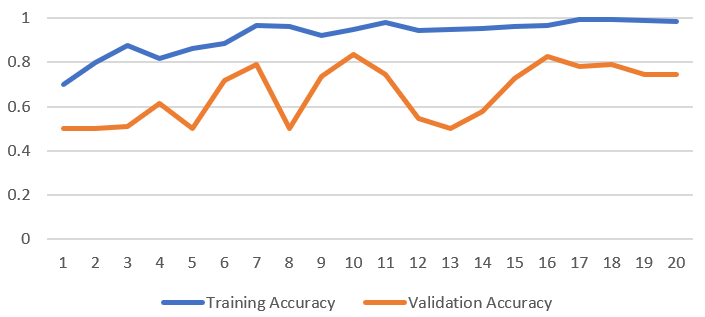

In [215]:
Image(filename = r"Pictures/graph - 20.PNG", width=600, height=600)

In [205]:
def get_proba_3(cropped_test_img):
    classes = np.array(train.columns[2:])
    proba = resnet_model_3.predict(cropped_test_img.reshape(1,224,224,3))
    safe_or_unsafe = np.argsort(proba[0])[:-3:-1]
    
    text = ""
    for i in range(2):
        text += "{}".format(classes[safe_or_unsafe[i]])+" ({:.3})".format(proba[0][safe_or_unsafe[i]])+" "
    
    return text 

def test_image_3(img):
    test_dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    test_resized = cv2.resize(test_dst, (500,250))
    img = image.img_to_array(test_resized)
    cropped_test_img = img[12:236, 134:358]
    cropped_test_img = cropped_test_img/255.0
    
    plt.imshow(cropped_test_img)
    plt.xlabel(get_proba_3(cropped_test_img))

#### Results

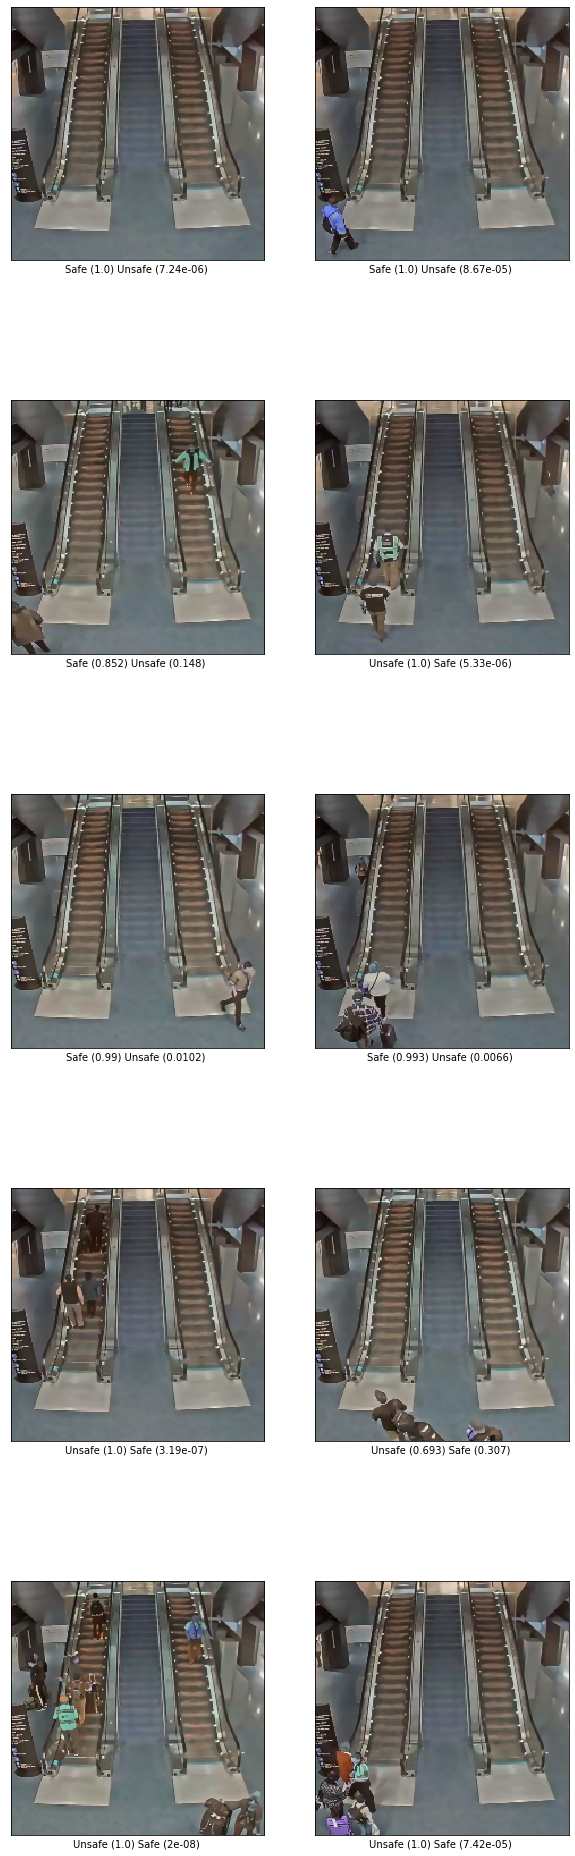

In [224]:
plt.figure(figsize=(10,35))
for i in range(len(image_names)):
    img = cv2.imread('Downloads/Sorted Escalators/'+image_names[i]+'.jpg')
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    test_image_3(img)

8/10 images were correctly classified.

## References
https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/
https://docs.opencv.org/3.3.1/d5/d69/tutorial_py_non_local_means.html
https://www.tensorflow.org/tutorials/keras/basic_classification